In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn import linear_model
from sklearn.metrics import r2_score

In [58]:
fp='D:\Code\Python\Datasets\mtcars.csv'

In [59]:
data=pd.read_csv(fp,sep=',')

In [60]:
data.shape

(32, 12)

In [61]:
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


EDA and Visualisation

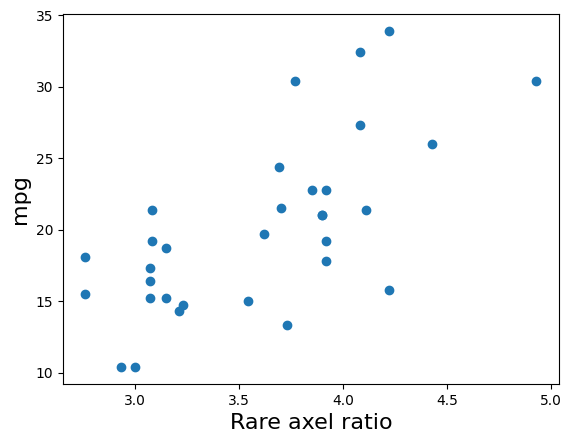

In [62]:
plot.scatter(data['drat'],data['mpg'])
plot.xlabel('Rare axel ratio',fontsize=16);
plot.ylabel('mpg',fontsize=16);

mpg=α+β.drat+ϵ

In [63]:
x=data[['drat']]
y=data[['mpg']]

In [64]:
lm=linear_model.LinearRegression()

In [65]:
fit_ml=lm.fit(X=x,y=y)

In [66]:
intercept=fit_ml.intercept_
intercept

array([-7.52461844])

In [67]:
beta=fit_ml.coef_
beta

array([[7.6782326]])

In [68]:
y_hat=intercept+np.dot(x,beta)
y_hat

array([[22.42048871],
       [22.42048871],
       [22.03657708],
       [16.12433797],
       [16.66181425],
       [13.66730354],
       [17.12250821],
       [20.80805986],
       [22.57405336],
       [22.57405336],
       [22.57405336],
       [16.04755565],
       [16.04755565],
       [16.04755565],
       [14.97260308],
       [15.51007936],
       [17.27607286],
       [23.80257057],
       [30.32906829],
       [24.87752314],
       [20.88484218],
       [13.66730354],
       [16.66181425],
       [21.11518916],
       [16.12433797],
       [23.80257057],
       [26.48995198],
       [21.42231847],
       [24.87752314],
       [20.27058358],
       [19.65632497],
       [24.03291755]])

Estimate α and β using OLS method

y= Xβ+ϵ

OLS estimator β^= (X^T*X^{-1})*X^T*y

In [69]:
n=data.shape[0]
intercept_col=np.ones((n,1))

In [70]:
X=np.hstack((intercept_col,x))

In [71]:
Xt=np.transpose(X)

In [72]:
XtX_inv=np.linalg.inv(np.matmul(Xt,X))

In [73]:
Xt_y=np.matmul(Xt,y)

In [74]:
beta_hat=np.matmul(XtX_inv,Xt_y)

In [75]:
beta_hat

,mpg
0,-7.524618
1,7.678233


In [78]:
def abline(slope,itercept):
    axes=plot.gca()
    x_vals=np.array(axes.get_xlim())
    y_vals=intercept + slope*x_vals
    plot.plot(x_vals,y_vals,'--')

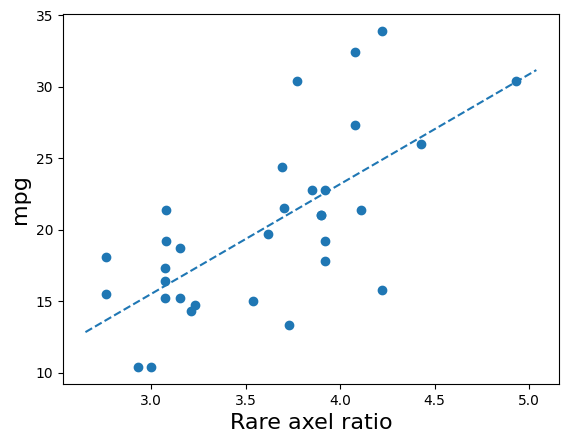

In [83]:
plot.scatter(data['drat'],data['mpg'])
plot.xlabel('Rare axel ratio',fontsize=16);
plot.ylabel('mpg',fontsize=16);
abline(7.6782326,-7.52461844)   # slope=7.6782326,intercept=-7.52461844

In [84]:
R2=r2_score(y,y_hat)
R2

0.46399516798508644